## Assignment 21 Solutions

## Q1. You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

Input:

        10

       /   \

     2      7

   /   \

 8      4

Output:

        8

      /   \

    4     10

  /   \

2      7

In [16]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def inorder_traversal(root, values):
    if root:
        inorder_traversal(root.left, values)
        values.append(root.value)
        inorder_traversal(root.right, values)

def assign_values(root, values):
    if root:
        assign_values(root.left, values)
        root.value = values.pop(0)
        assign_values(root.right, values)

def binary_tree_to_bst(root):
    values = []
    inorder_traversal(root, values)
    values.sort()
    assign_values(root, values)

In [17]:
root = TreeNode(10)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(8)
root.left.right = TreeNode(4)

binary_tree_to_bst(root)

## Q2.Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

Example:

Consider the following BST:

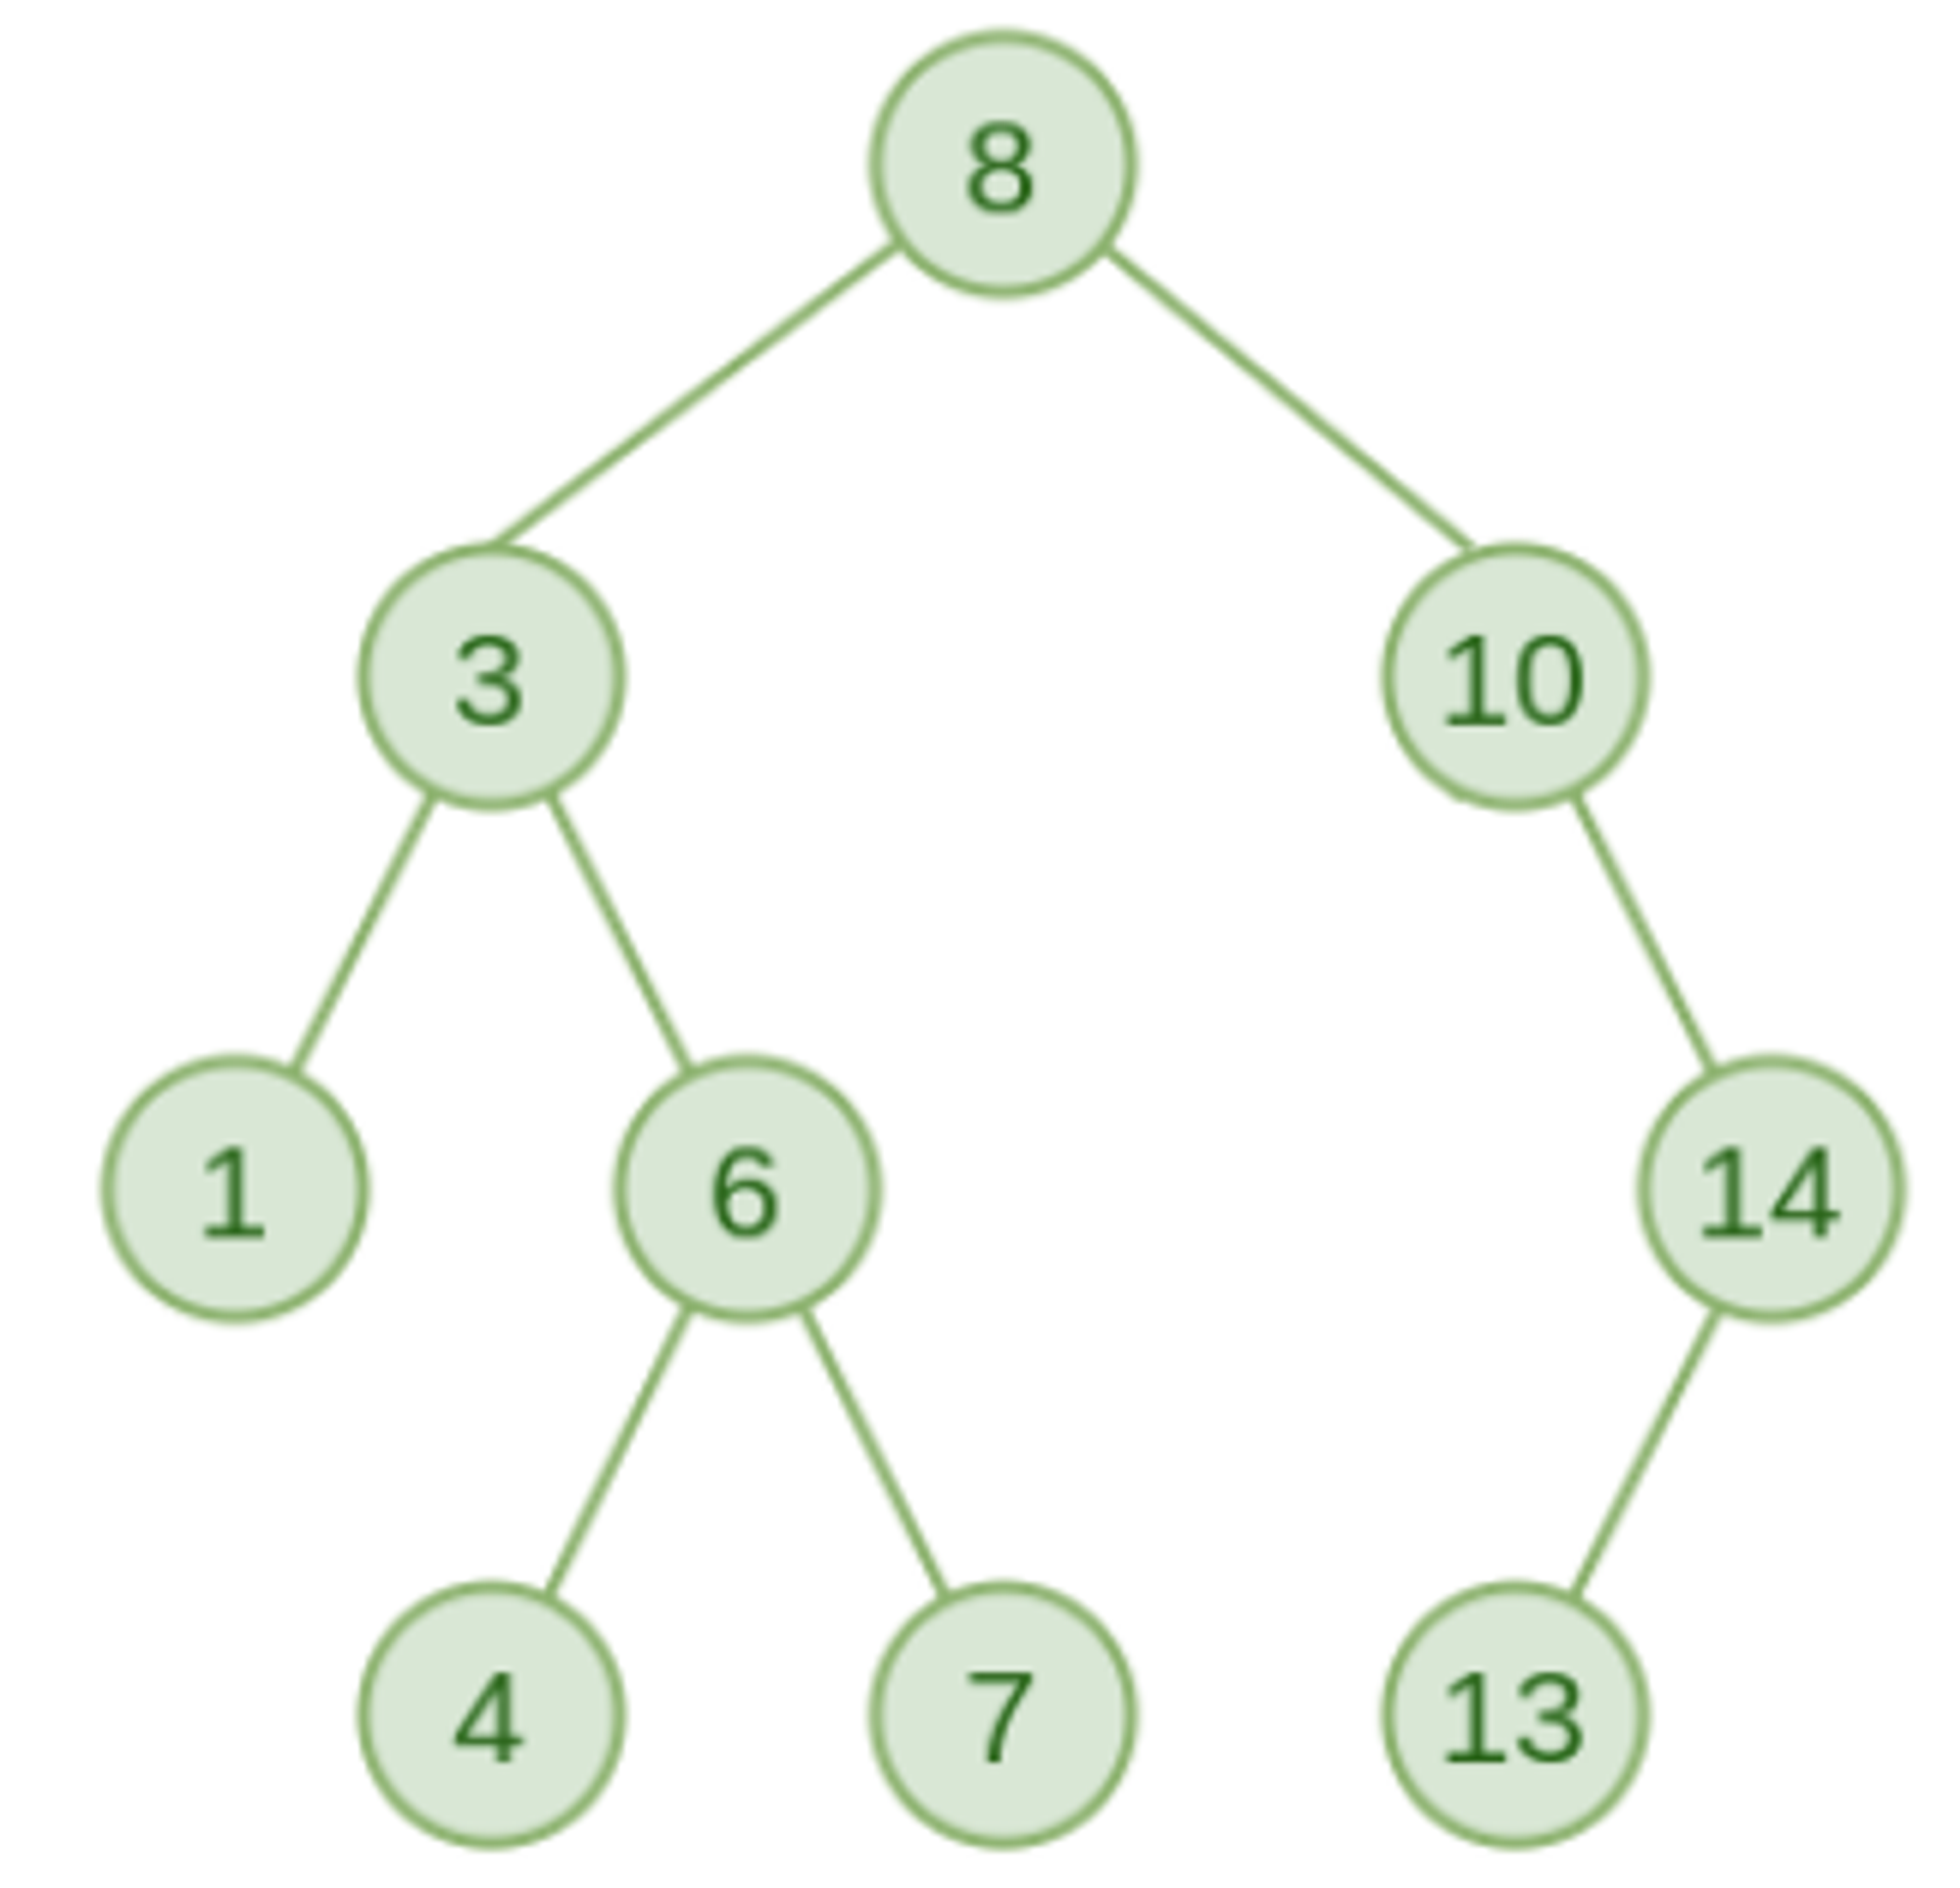

**Input-1:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 6

node-2 = 14

**Output-1:**

The distance between the two keys = 4

**Input-2:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 3

node-2 = 4

**Output-2:**

The distance between the two keys = 2

In [30]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def find_distance(root, node1, node2):
    if root is None:
        return 0
    
    if root.value > node1 and root.value > node2:
        return find_distance(root.left, node1, node2)
    
    if root.value < node1 and root.value < node2:
        return find_distance(root.right, node1, node2)
    
    if (root.value >= node1 and root.value <= node2) or (root.value <= node1 and root.value >= node2):
        return distance_from_node(root, node1) + distance_from_node(root, node2)

def distance_from_node(root, node):
    if root.value == node:
        return 0
    
    if root.value > node:
        return 1 + distance_from_node(root.left, node)
    
    if root.value < node:
        return 1 + distance_from_node(root.right, node)

In [31]:
root = TreeNode(8)
root.left = TreeNode(3)
root.right = TreeNode(10)
root.left.left = TreeNode(1)
root.left.right = TreeNode(6)
root.left.right.left = TreeNode(4)
root.left.right.right = TreeNode(7)
root.right.right = TreeNode(14)
root.right.right.left = TreeNode(13)

# Find the distance between node-1 = 6 and node-2 = 14
distance = find_distance(root, 6, 14)
print("The distance between the two keys:", distance)

# Find the distance between node-1 = 3 and node-2 = 4
distance = find_distance(root, 3, 4)
print("The distance between the two keys:", distance)

The distance between the two keys: 4
The distance between the two keys: 2


## Q3. Write a program to convert a binary tree to a doubly linked list.

Input:

        10

       /   \

     5     20

           /   \

        30     35

Output:

5 10 30 20 35

In [50]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def convert_to_doubly_linked_list(root):
    if root is None:
        return None

    # Recursive in-order traversal
    if root.left:
        left_head = convert_to_doubly_linked_list(root.left)
        while left_head.right:
            left_head = left_head.right
        left_head.right = root
        root.left = left_head

    if root.right:
        right_head = convert_to_doubly_linked_list(root.right)
        while right_head.left:
            right_head = right_head.left
        right_head.left = root
        root.right = right_head

    # Find the head of the doubly linked list
    head = root
    while head.left:
        head = head.left

    return head

In [51]:
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(20)
root.right.left = TreeNode(30)
root.right.right = TreeNode(35)

# Convert binary tree to doubly linked list
head = convert_to_doubly_linked_list(root)

# Print the doubly linked list
current = head
while current:
    print(current.value, end=" ")
    current = current.right

5 10 30 20 35 

## Q4. Write a program to connect nodes at the same level.

Input:

        1

      /   \

    2      3

  /   \   /   \

4     5 6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1

In [64]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.next = None

def connect_nodes_at_same_level(root):
    if root is None:
        return

    queue = [root]

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            current_node = queue.pop(0)

            if i < level_size - 1:
                current_node.next = queue[0]

            if current_node.left:
                queue.append(current_node.left)
            if current_node.right:
                queue.append(current_node.right)

In [65]:
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Connect nodes at the same level
connect_nodes_at_same_level(root)

# Print the connections
current = root
while current:
    temp = current
    while temp:
        if temp.next:
            print(f"{temp.value} ->", end=" ")
        else:
            print(f"{temp.value} -> -1")
        temp = temp.next
    current = current.left

1 -> -1
2 -> 3 -> -1
4 -> 5 -> 6 -> 7 -> -1
